# Sales Analysis and Visualization

This notebook contains code for sales analysis and visualization using Pandas, Matplotlib, Seaborn, and Plotly Express.

<h4> Import Libraries

First, let's import the necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
from PIL import Image

<h4> Read the dataset

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [6]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [7]:
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


<h4> Data Cleaning and Preprocessing

In [8]:
df['Postal Code'] = df['Postal Code'].fillna(5401)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

<h4> Feature Engineering

In [9]:
df['order_month'] = df['Order Date'].dt.month
df['order_year'] = df['Order Date'].dt.year

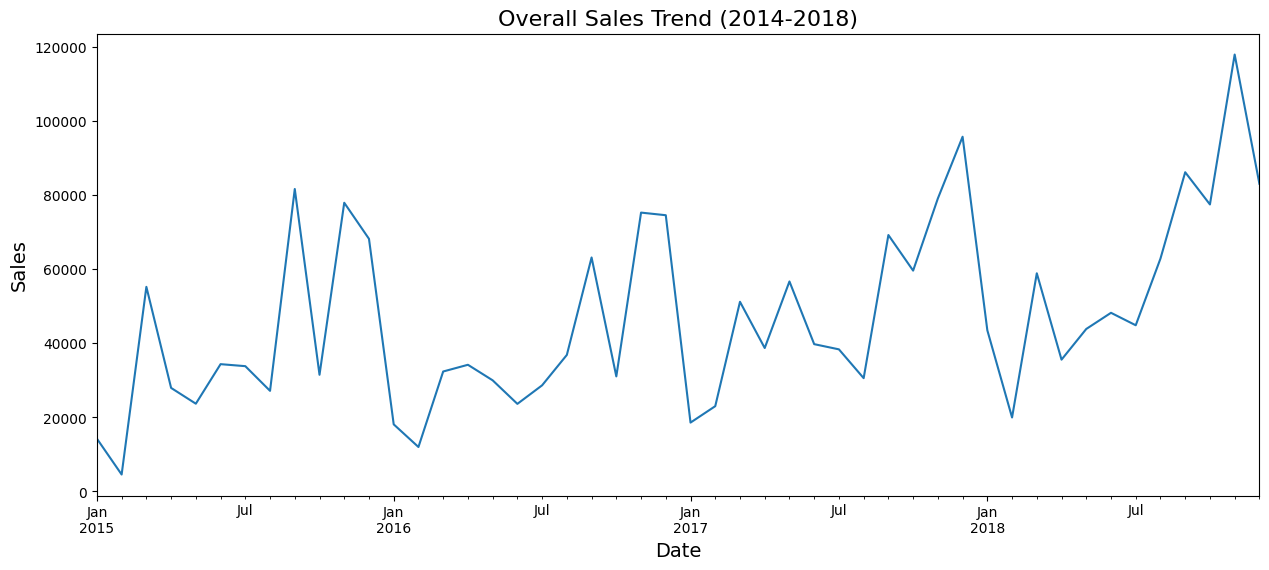

In [10]:
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()
fig, ax = plt.subplots(figsize=(15, 6))
monthly_sales.plot(ax=ax)
ax.set_title('Overall Sales Trend (2014-2018)', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Sales', fontsize=14)
plt.show()

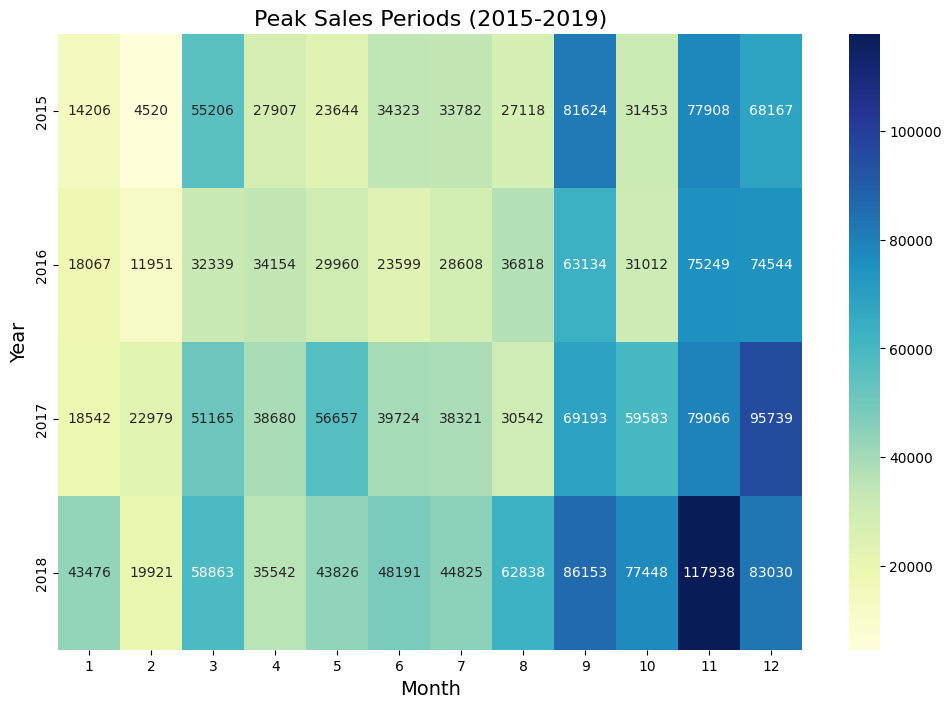

In [11]:
monthly_sales = df.groupby(['order_year', 'order_month'])['Sales'].sum().reset_index()
monthly_sales_pivot = monthly_sales.pivot(index='order_year', columns='order_month', values='Sales')
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_sales_pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Peak Sales Periods (2015-2019)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.show()

<h4> Most Valuable Customers

         Customer Name      Sales
0          Sean Miller  25043.050
1         Tamara Chand  19052.218
2         Raymond Buch  15117.339
3         Tom Ashbrook  14595.620
4        Adrian Barton  14473.571
5         Ken Lonsdale  14175.229
6         Sanjit Chand  14142.334
7         Hunter Lopez  12873.298
8         Sanjit Engle  12209.438
9   Christopher Conant  12129.072
10        Todd Sumrall  11891.751
11           Greg Tran  11820.120
12        Becky Martin  11789.630
13         Seth Vernon  11470.950
14     Caroline Jumper  11164.974
15         Clay Ludtke  10880.546
16       Maria Etezadi  10663.728
17      Karen Ferguson  10604.266
18        Bill Shonely  10501.653
19        Edward Hooks   9940.380


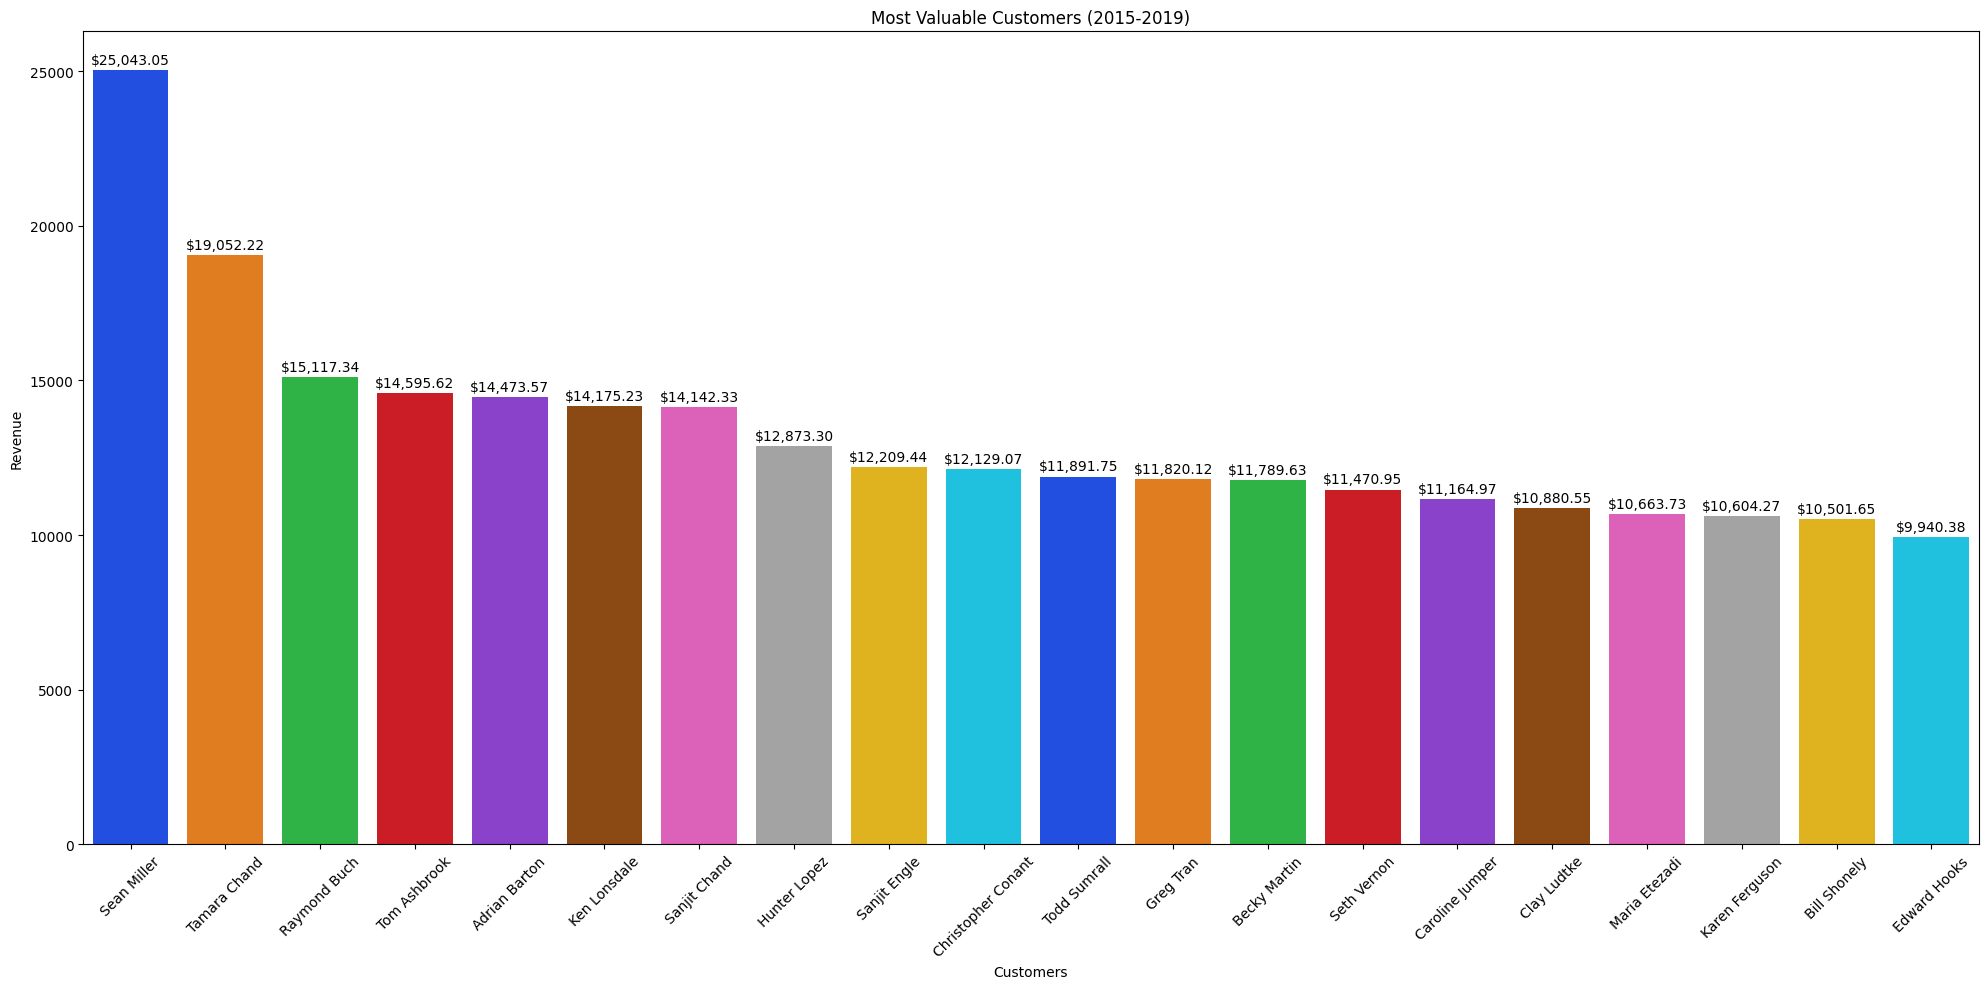

In [12]:
top_customers = df.groupby("Customer Name")["Sales"].sum().nlargest(20).reset_index()
print(top_customers)
fig1, ax1 = plt.subplots(figsize=(20, 10))
sns.barplot(x='Customer Name', y='Sales', hue='Customer Name', data=top_customers, palette='bright', legend=False)
ax1.set_title("Most Valuable Customers (2015-2019)")
ax1.set_xlabel("Customers")
ax1.set_ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
for i, v in enumerate(top_customers['Sales']):
    plt.text(i, v + 100, f'${v:,.2f}', ha='center', va='bottom')
plt.show(fig1)

<h4> States with Highest Revenue

             State        Sales
0       California  446306.4635
1         New York  306361.1470
2            Texas  168572.5322
3       Washington  135206.8500
4     Pennsylvania  116276.6500
5          Florida   88436.5320
6         Illinois   79236.5170
7         Michigan   76136.0740
8             Ohio   75130.3500
9         Virginia   70636.7200
10  North Carolina   55165.9640
11         Indiana   48718.4000
12         Georgia   48219.1100
13        Kentucky   36458.3900
14         Arizona   35272.6570
15      New Jersey   34610.9720
16        Colorado   31841.5980
17       Wisconsin   31173.4300
18       Tennessee   30661.8730
19       Minnesota   29863.1500


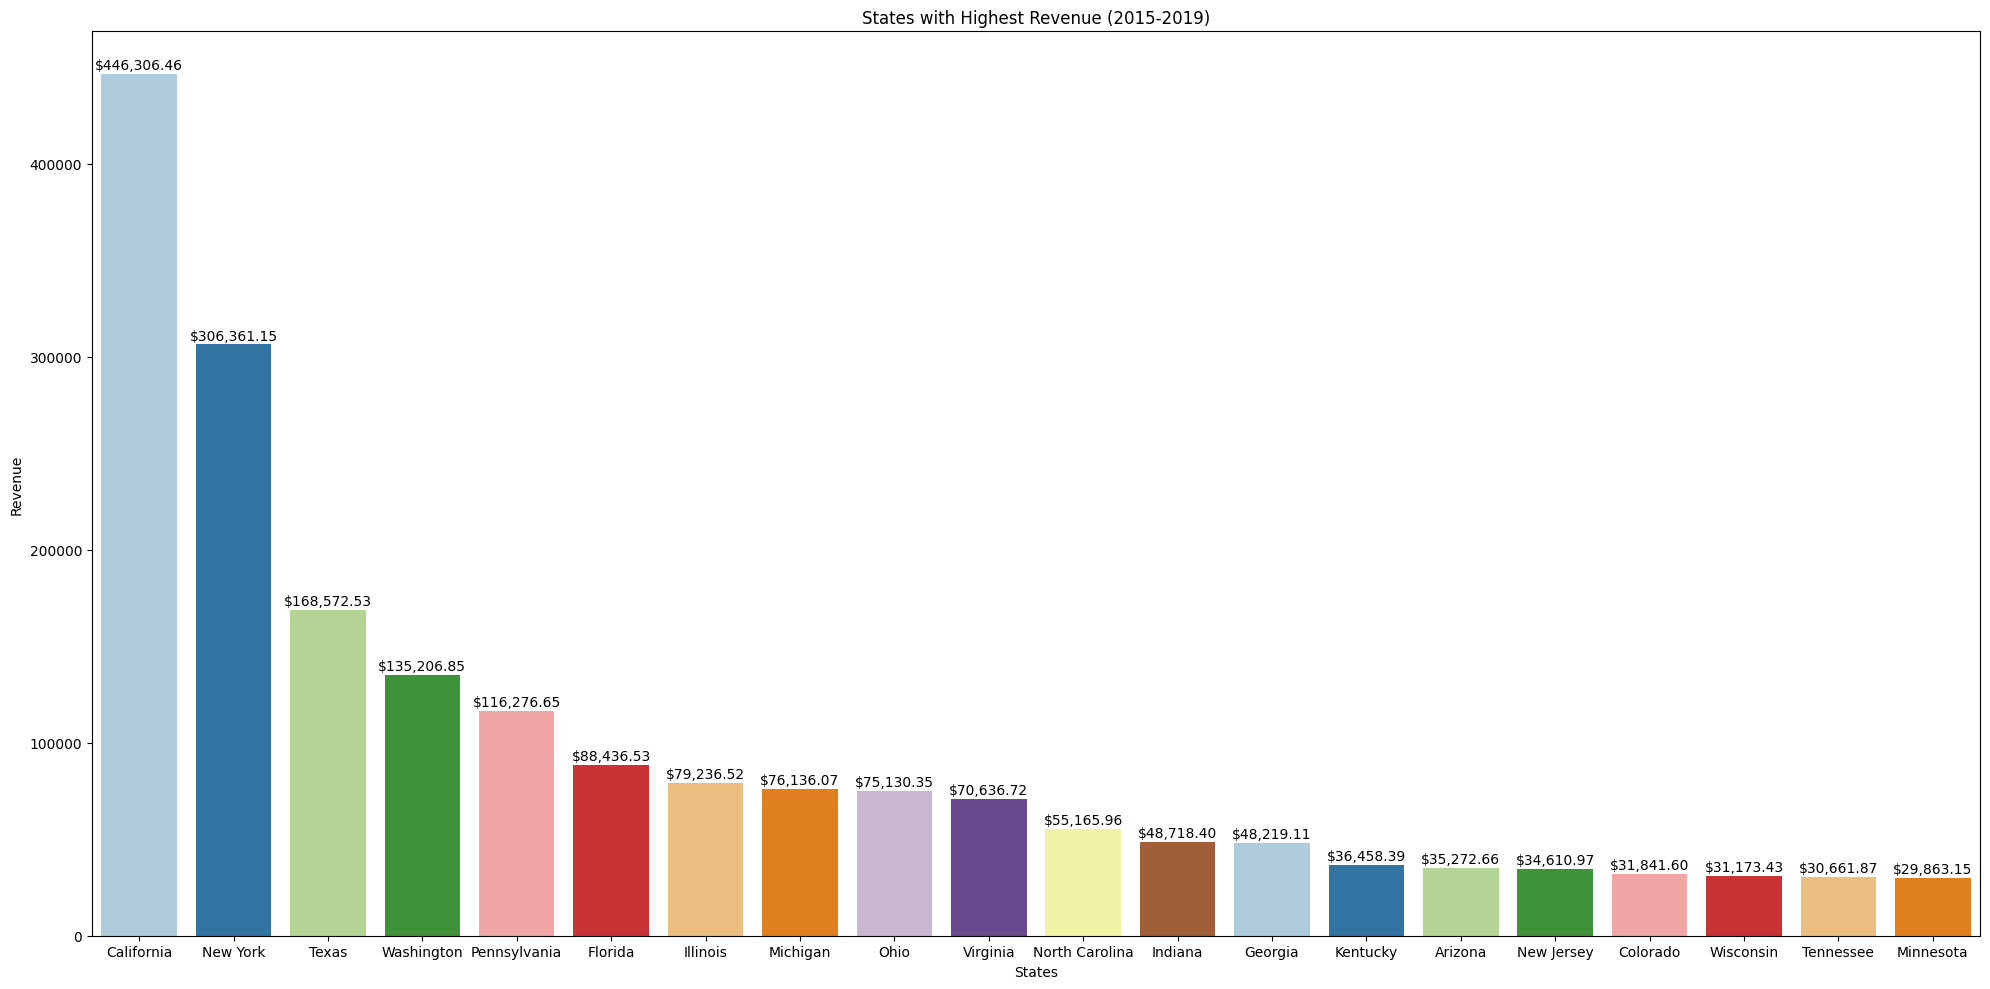

In [13]:
top_states = df.groupby("State")["Sales"].sum().nlargest(20).reset_index()
print(top_states)
fig2, ax2 = plt.subplots(figsize=(20, 10))
sns.barplot(x='State', y='Sales', hue='State', data=top_states, palette='Paired', legend=False)
ax2.set_title("States with Highest Revenue (2015-2019)")
ax2.set_xlabel("States")
ax2.set_ylabel("Revenue")
plt.xticks(rotation=0)
plt.tight_layout()
for i, v in enumerate(top_states['Sales']):
    plt.text(i, v + 1000, f'${v:,.2f}', ha='center', va='bottom')
plt.show(fig2)

<h4> Cities with Highest Revenue

             City        Sales
0   New York City  252462.5470
1     Los Angeles  173420.1810
2         Seattle  116106.3220
3   San Francisco  109041.1200
4    Philadelphia  108841.7490
5         Houston   63956.1428
6         Chicago   47820.1330
7       San Diego   47521.0290
8    Jacksonville   44713.1830
9         Detroit   42446.9440
10    Springfield   41827.8100
11       Columbus   38662.5630
12         Newark   28448.0490
13       Columbia   25283.3240
14        Jackson   24963.8580
15      Lafayette   24944.2800
16    San Antonio   21843.5280
17     Burlington   21668.0820
18      Arlington   20214.5320
19         Dallas   20127.9482


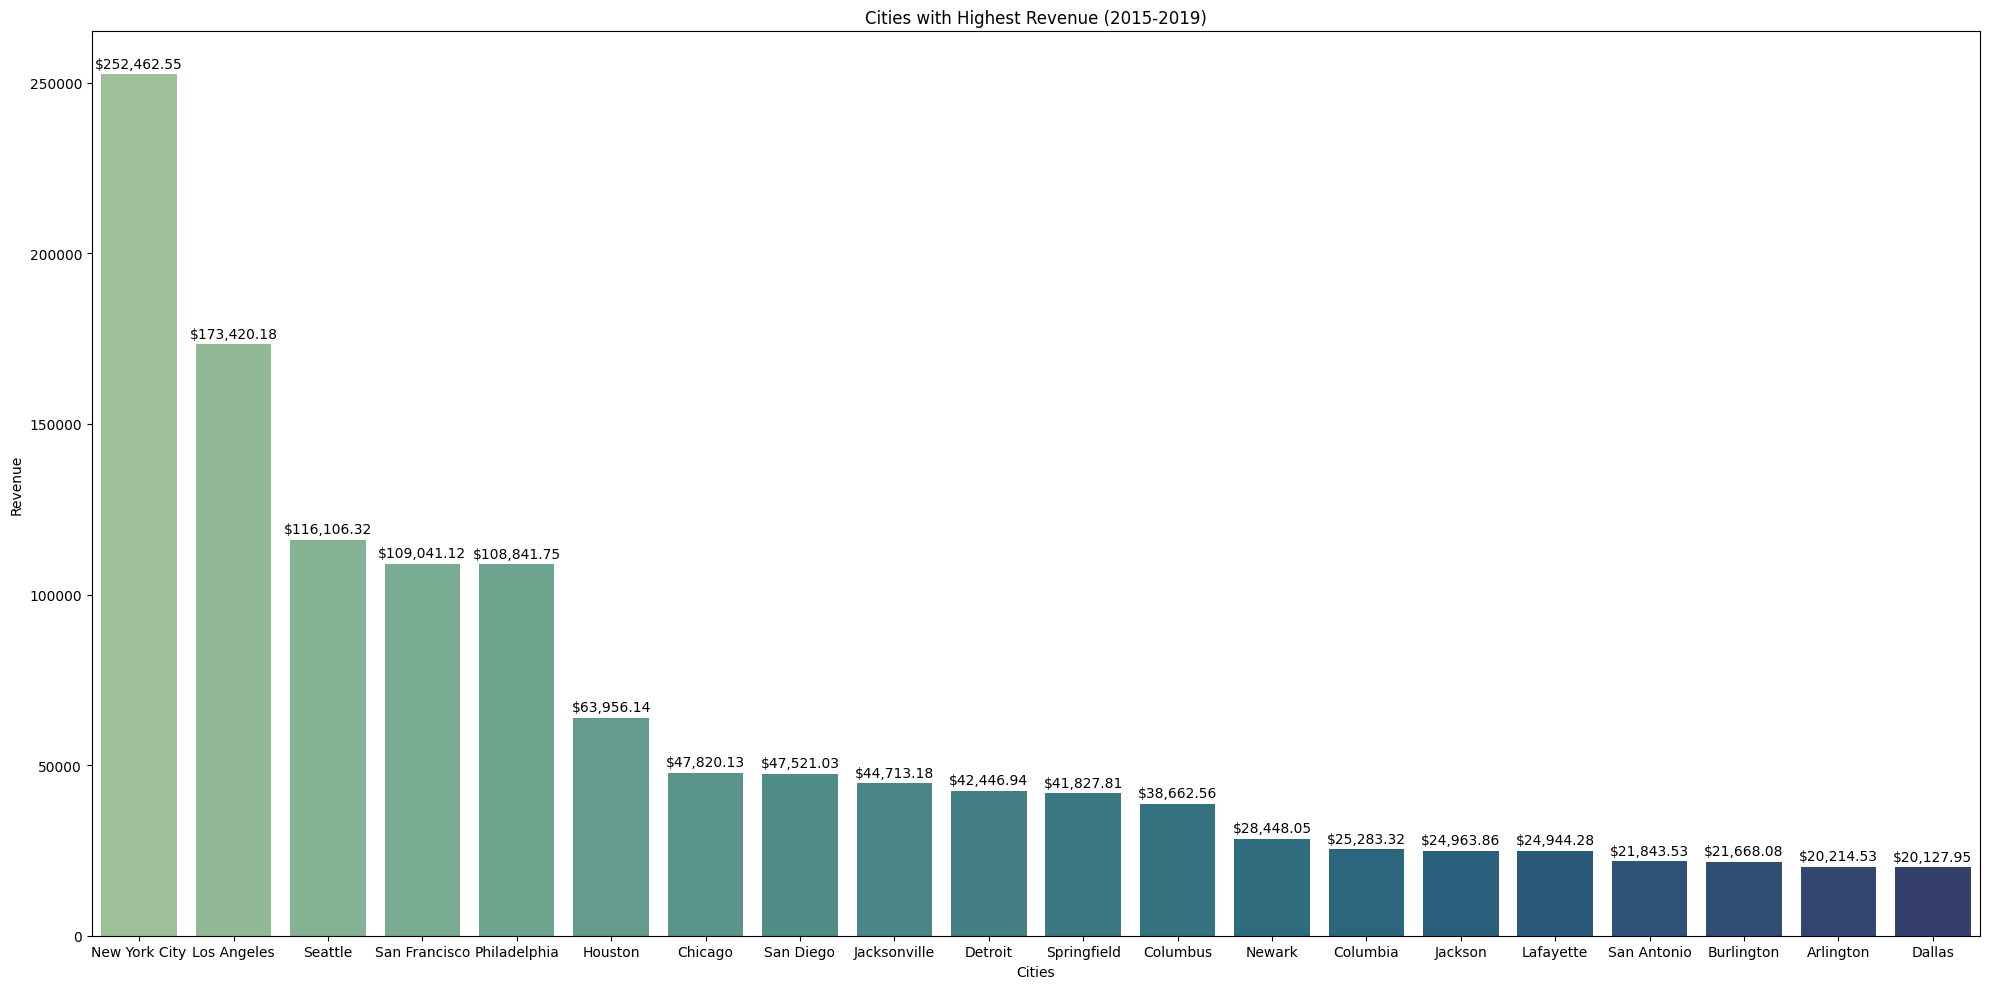

In [14]:
top_cities = df.groupby("City")["Sales"].sum().nlargest(20).reset_index()
print(top_cities)
fig3, ax3 = plt.subplots(figsize=(20,10))
sns.barplot(x='City', y='Sales', hue='City', data=top_cities, palette='crest', legend=False)
ax3.set_title("Cities with Highest Revenue (2015-2019)")
ax3.set_xlabel("Cities")
ax3.set_ylabel("Revenue")
plt.xticks(rotation=0)
plt.tight_layout()
for i, v in enumerate(top_cities['Sales']):
    plt.text(i, v + 1000, f'${v:,.2f}', ha='center', va='bottom')
plt.show(fig3)


In [15]:
total_revenue = df['Sales'].sum()
top_states = df.groupby("State")["Sales"].sum().nlargest(10).reset_index()
top_10_states_revenue = top_states['Sales'].sum()
revenue_contribution_of_top_10_states = top_10_states_revenue / total_revenue * 100

print(f"Top 10 states contributed to {revenue_contribution_of_top_10_states:.2f}% of total revenue.")
top_cities = df.groupby("City")["Sales"].sum().nlargest(20).reset_index()
top_20_cities_revenue = top_cities['Sales'].sum()
revenue_contribution_of_top_20_customers = top_20_cities_revenue / total_revenue * 100

print(f"Top 20 cities contributed to {revenue_contribution_of_top_20_customers:.2f}% of total revenue.")

Top 10 states contributed to 69.08% of total revenue.
Top 20 cities contributed to 56.35% of total revenue.


<h4> Region Wise Revenue

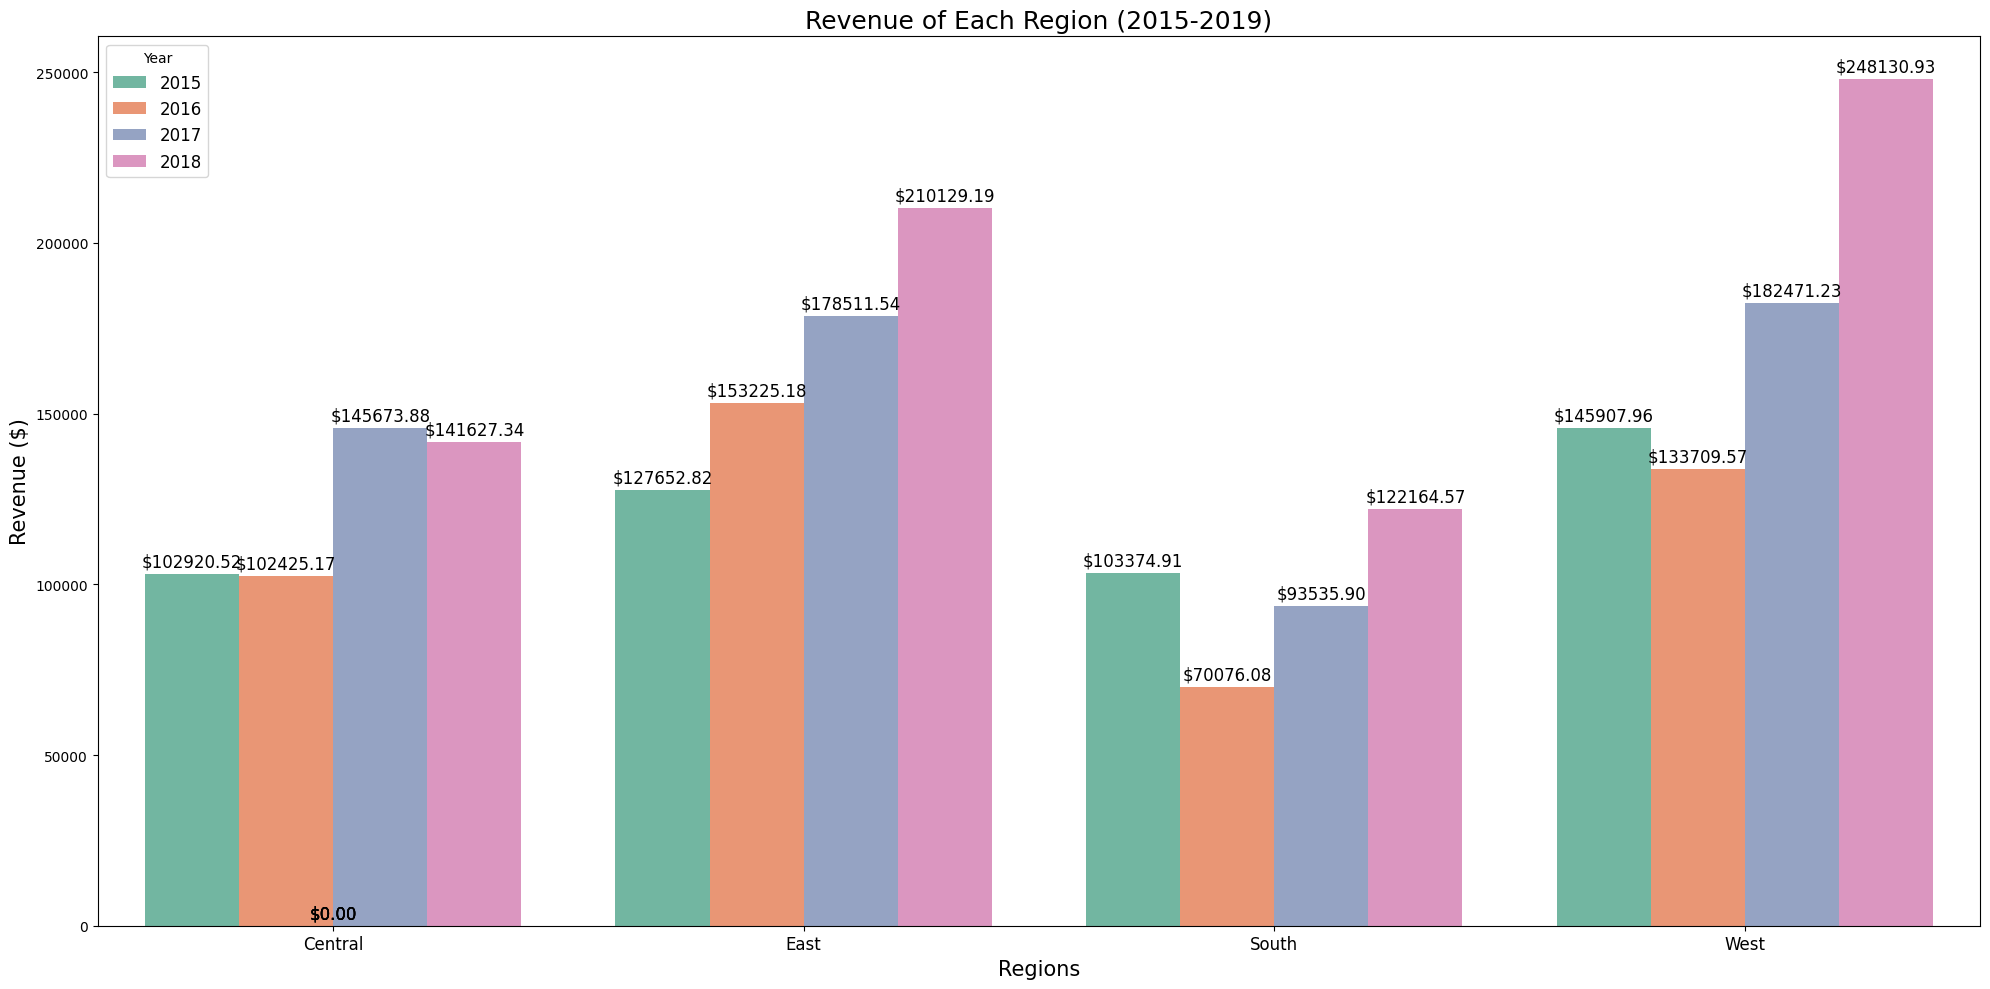

In [16]:
regions_cat = df.groupby(['Region', 'order_year'])['Sales'].sum().reset_index()
fig4, ax4 = plt.subplots(figsize=(20, 10))
bar_plot = sns.barplot(data=regions_cat, x='Region', y='Sales', hue='order_year', palette='Set2')
ax4.set_title("Revenue of Each Region (2015-2019)", fontsize=18)
ax4.set_xlabel("Regions", fontsize=15)
ax4.set_ylabel("Revenue ($)", fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Year', fontsize=12)
for p in bar_plot.patches:
    bar_plot.annotate(f"${p.get_height():.2f}",
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points',
                      fontsize=12, color='black')
plt.tight_layout()
plt.show()

<h4> Sales Breakdown by Category and Subcategory

      Category Sub-Category       Sales
16  Technology       Phones  327782.448


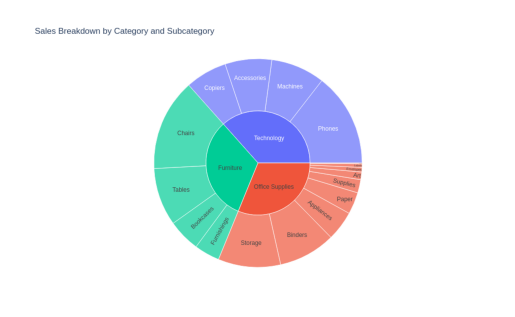

In [17]:
category_sales = df.groupby(['Category', 'Sub-Category']).agg({'Sales': 'sum'}).reset_index()

category_sales = category_sales.sort_values(by='Sales', ascending=False)

top_category_subcategory = category_sales.head(1)
print(top_category_subcategory)

fig5 = px.sunburst(df, path=["Category", "Sub-Category"], values="Sales",
                    color="Category", hover_data={'Sales': ':,.2f'},
                    title="Sales Breakdown by Category and Subcategory",
                    width=1000, height=600)
fig5.update_traces(hovertemplate='<b>%{label}</b><br>Revenue: $%{value:,.2f}')

fig5.show()
fig5.write_image("sales_breakdown.png")
img = Image.open("sales_breakdown.png")
plt.imshow(img)
plt.axis('off')
plt.show()

<h4> Year-over-Year Sales by Category

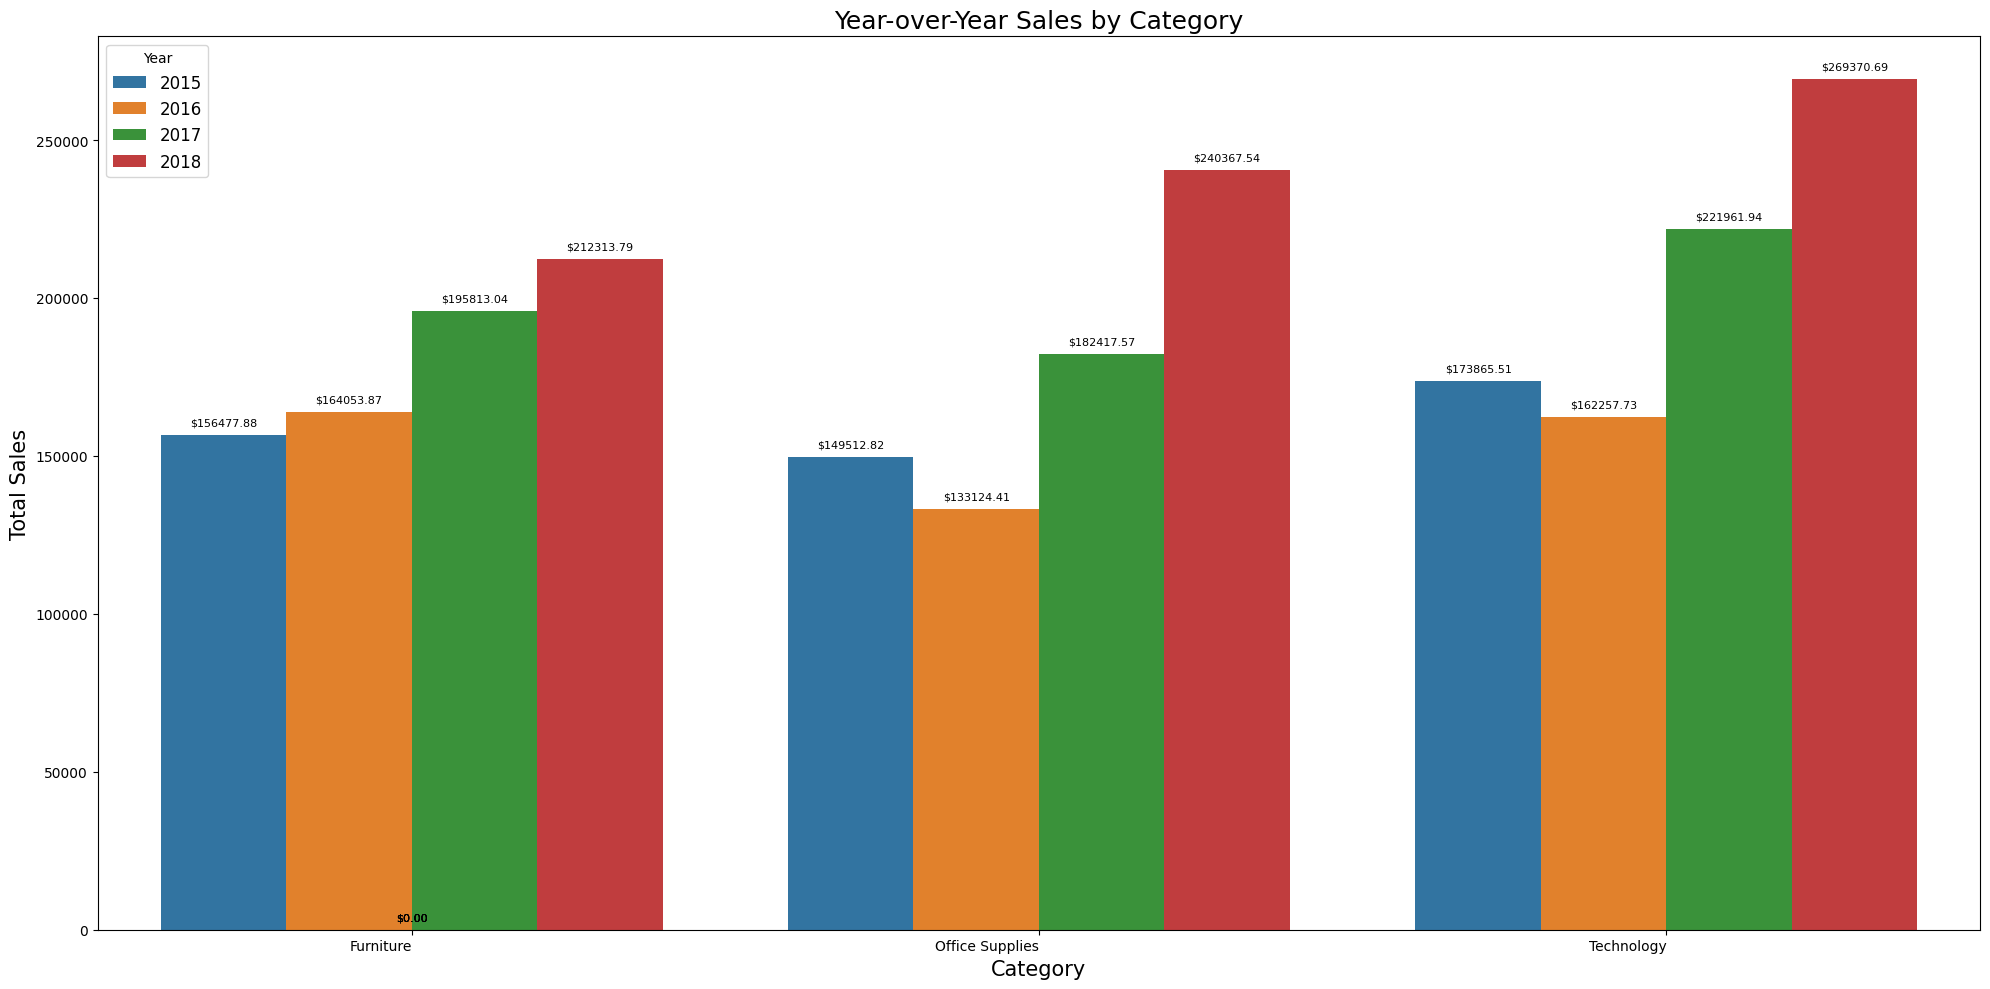

In [18]:
cat_sales = df.groupby(['Category', 'order_year'])['Sales'].sum().reset_index()
fig6 , ax6 = plt.subplots(figsize=(20, 10))
bar_plot = sns.barplot(data=cat_sales, x='Category', y='Sales', hue='order_year', palette='tab10')
ax6.set_title('Year-over-Year Sales by Category', fontsize=18)
ax6.set_xlabel('Category', fontsize=15)
ax6.set_ylabel('Total Sales', fontsize=15)
plt.xticks(rotation=0, ha='right')
plt.legend(title='Year', fontsize=12)
for p in bar_plot.patches:
    bar_plot.annotate(f"${p.get_height():.2f}",
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points',
                      fontsize=8, color='black')
plt.tight_layout()
plt.show()

<h4> Top Products by Sales

                                        Product Name      Sales
0              Canon imageCLASS 2200 Advanced Copier  61599.824
1  Fellowes PB500 Electric Punch Plastic Comb Bin...  27453.384
2  Cisco TelePresence System EX90 Videoconferenci...  22638.480
3       HON 5400 Series Task Chairs for Big and Tall  21870.576
4         GBC DocuBind TL300 Electric Binding System  19823.479
5   GBC Ibimaster 500 Manual ProClick Binding System  19024.500
6               Hewlett Packard LaserJet 3310 Copier  18839.686
7  HP Designjet T520 Inkjet Large Format Printer ...  18374.895
8          GBC DocuBind P400 Electric Binding System  17965.068
9        High Speed Automatic Electric Letter Opener  17030.312


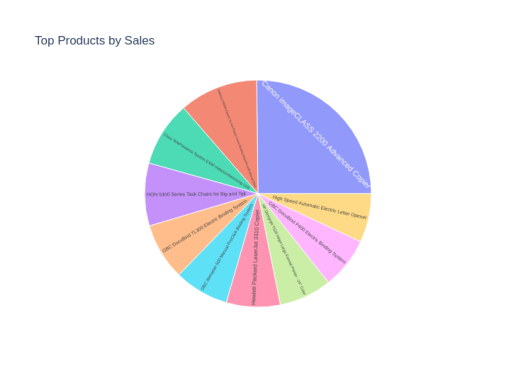

In [19]:
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()
print(top_products)
top_products['Sales_Percentage'] = (top_products['Sales'] / top_products['Sales'].sum()) * 100

hover_template = '<b>%{label}</b><br>Revenue: $%{value}<br>Percentage: %{customdata:.1f}%'

fig7 = px.sunburst(
    top_products,
    path=['Product Name'],
    values='Sales',
    title="Top Products by Sales",
    hover_data={'customdata': top_products['Sales_Percentage']},
)

fig7.update_traces(hovertemplate=hover_template)

fig7.show()
fig7.write_image("Top Products by Sales.png")
img = Image.open("Top Products by Sales.png")
plt.imshow(img)
plt.axis('off')
plt.show()

<h4> Sales by Shipping Mode

        Ship Mode         Sales
0     First Class  3.455723e+05
1        Same Day  1.252190e+05
2    Second Class  4.499142e+05
3  Standard Class  1.340831e+06


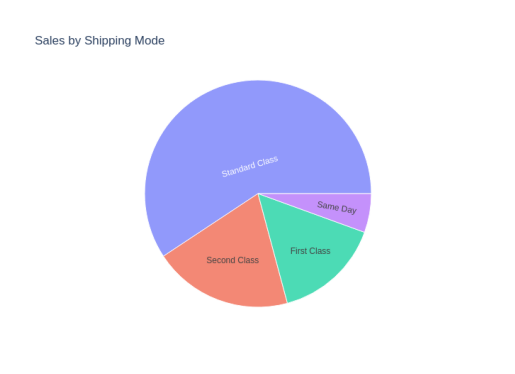

In [20]:
ship_sales = df.groupby('Ship Mode')['Sales'].sum().reset_index()
print(ship_sales)

ship_sales['Sales_Percentage'] = (ship_sales['Sales'] / ship_sales['Sales'].sum()) * 100

hover_template = '<b>%{label}</b><br>Revenue: $%{value:,.2f}<br>Percentage: %{customdata:.1f}%'

fig8 = px.sunburst(
    ship_sales,
    path=['Ship Mode'],
    values='Sales',
    title="Sales by Shipping Mode",
    hover_data={'customdata': ship_sales['Sales_Percentage']},
)

fig8.update_traces(hovertemplate=hover_template)
fig8.show()
fig8.write_image("Sales by Shipping Mode.png")
img = Image.open("Sales by Shipping Mode.png")
plt.imshow(img)
plt.axis('off')
plt.show()